In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,recall_score,f1_score,precision_score

### Run the data through different Models and record their metrics in the following table.

In [2]:
classifier = ['DT_Entropy','DT_Gini','KNN','SVM']
metrics = ['Accuracy','Recall','Precision','F1_score']
table = pd.DataFrame(index=metrics,columns=classifier)
table

,DT_Entropy,DT_Gini,KNN,SVM
Accuracy,NaN,NaN,NaN,NaN
Recall,NaN,NaN,NaN,NaN
Precision,NaN,NaN,NaN,NaN
F1_score,NaN,NaN,NaN,NaN


In [3]:
df = pd.read_csv('indian_liver_patient.csv')

In [4]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [6]:
df['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64


Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

416 liver patient records and 167 non liver patient

1: liver patient

2: Non-liver patient

In [7]:
for i in np.arange(1,3):
    if i==1:
        print(i,' : Liver Disease,',df['Dataset'].value_counts()[i],' patients.')
    if i==2:
        print(i,' : No Liver Disease,',df['Dataset'].value_counts()[i],' patients.')
    

1  : Liver Disease, 416  patients.
2  : No Liver Disease, 167  patients.


In [8]:
df.shape

(583, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [10]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [11]:
df['Albumin_and_Globulin_Ratio'].describe()

count    579.000000
mean       0.947064
std        0.319592
min        0.300000
25%        0.700000
50%        0.930000
75%        1.100000
max        2.800000
Name: Albumin_and_Globulin_Ratio, dtype: float64

In [12]:
df['Albumin_and_Globulin_Ratio'].unique()

array([0.9 , 0.74, 0.89, 1.  , 0.4 , 1.3 , 1.1 , 1.2 , 0.8 , 0.6 , 0.87,
       0.7 , 0.92, 0.55, 0.5 , 1.85, 0.95, 1.4 , 1.18, 0.61, 1.34, 1.39,
       1.6 , 1.58, 1.25, 0.78, 0.76, 1.55, 0.71, 0.62, 0.67, 0.75, 1.16,
       1.5 , 1.66, 0.96, 1.38, 0.52, 0.47, 0.93, 0.48, 0.58, 0.69, 1.27,
       1.12, 1.06, 0.53, 1.03, 0.68,  nan, 1.9 , 1.7 , 1.8 , 0.3 , 0.97,
       0.35, 1.51, 0.64, 0.45, 1.36, 0.88, 1.09, 1.11, 1.72, 2.8 , 0.46,
       0.39, 1.02, 2.5 , 0.37])

In [13]:
df['Albumin_and_Globulin_Ratio'].isnull().sum()

4

In [14]:
df[df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [15]:
# df['Albumin_and_Globulin_Ratio'].mode()

In [16]:
df['Albumin_and_Globulin_Ratio']=df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mode()[0])
df['Albumin_and_Globulin_Ratio'].isnull().sum(),df['Albumin_and_Globulin_Ratio'].describe()

(0,
 count    583.000000
 mean       0.947427
 std        0.318522
 min        0.300000
 25%        0.700000
 50%        0.950000
 75%        1.100000
 max        2.800000
 Name: Albumin_and_Globulin_Ratio, dtype: float64)

# Encoding the Gender column

In [17]:
#Encoding the Gender column

categorical = ['Gender']
ohe = OneHotEncoder()
ohe.fit(df[categorical])

enc_df = pd.DataFrame(ohe.transform(df[categorical]).toarray(),columns=ohe.get_feature_names(categorical))

#concatenating the Data with Encoded gender values

data = df.join(enc_df).drop('Gender',axis=1)
data.head()



C:\Users\tanze\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1.0,0.0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0.0,1.0
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0.0,1.0
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0.0,1.0
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0.0,1.0


In [18]:
#Rearranging the DataFrame:

# dataset = df['Dataset'].values.reshape(-1,1)
# hospital_data.drop('Dataset',axis=1,inplace=True)
# hospital_data.insert(11,'Dataset',dataset)
# hospital_data.head()

In [19]:
# hospital_data['Dataset'].values.reshape(-1,1)

## Checking the distribution of Dataset

In [20]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947427,1.286449,0.243568,0.756432
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318522,0.452490,0.429603,0.429603
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000,0.000000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.950000,1.000000,0.000000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000,0.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000,1.000000,1.000000


In [21]:
print('Liver Disease ',round(data['Dataset'].value_counts()[1]/len(data)*100,2),'% of data.')
print('Non-Liver Disease ',round(data['Dataset'].value_counts()[2]/len(data)*100,2),'% of data.')
print('\nLiver Disease: ',data['Dataset'].value_counts()[1])
print('Non-Liver Disease: ',data['Dataset'].value_counts()[2])

Liver Disease  71.36 % of data.
Non-Liver Disease  28.64 % of data.

Liver Disease:  416
Non-Liver Disease:  167


Text(0.5, 1.0, 'Frequency distribution of Dataset')

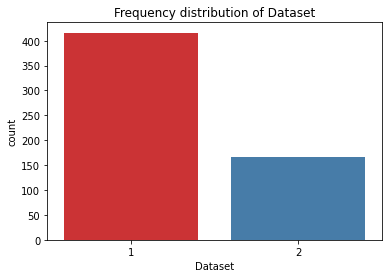

In [22]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.countplot(x="Dataset", data=data, palette="Set1")
ax.set_title("Frequency distribution of Dataset")


In [23]:
data.drop(['Age','Dataset','Gender_Female', 'Gender_Male'],axis=1).describe()

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947427
std,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318522
min,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.950000
75%,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [24]:
data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1.0,0.0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0.0,1.0
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0.0,1.0
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0.0,1.0
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0.0,1.0


In [25]:
data.columns.drop(['Age','Dataset','Gender_Female', 'Gender_Male'])

Index(['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio'],
      dtype='object')

In [26]:
data.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

## Scaling the DataFrame:

In [27]:
std_scalar = StandardScaler()

In [28]:
for i in data.columns.drop(['Age','Dataset','Gender_Female', 'Gender_Male']):
    data[i] = std_scalar.fit_transform(data[i].values.reshape(-1,1))



In [29]:
data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.149025,1,1.0,0.0
1,62,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.651777,1,0.0,1.0
2,62,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.180447,1,0.0,1.0
3,58,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.165194,1,0.0,1.0
4,72,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.720124,1,0.0,1.0


In [30]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
count,583.000000,5.830000e+02,5.830000e+02,5.830000e+02,5.830000e+02,5.830000e+02,5.830000e+02,5.830000e+02,5.830000e+02,583.000000,583.000000,583.000000
mean,44.746141,1.571070e-16,1.437767e-16,-8.379042e-17,-3.941958e-17,1.047380e-17,7.603980e-16,2.787936e-16,4.730350e-16,1.286449,0.243568,0.756432
std,16.189833,1.000859e+00,1.000859e+00,1.000859e+00,1.000859e+00,1.000859e+00,1.000859e+00,1.000859e+00,1.000859e+00,0.452490,0.429603,0.429603
min,4.000000,-4.672322e-01,-4.939640e-01,-9.375716e-01,-3.875487e-01,-3.461066e-01,-3.488354e+00,-2.820521e+00,-2.034343e+00,1.000000,0.000000,0.000000
25%,33.000000,-4.027597e-01,-4.583272e-01,-4.740928e-01,-3.163016e-01,-2.941442e-01,-6.299472e-01,-6.817159e-01,-7.774646e-01,1.000000,0.000000,1.000000
50%,45.000000,-3.705234e-01,-4.226904e-01,-3.401989e-01,-2.505351e-01,-2.352536e-01,1.077063e-01,-5.265548e-02,8.084554e-03,1.000000,0.000000,1.000000
75%,58.000000,-1.126334e-01,-6.632235e-02,3.058412e-02,-1.107812e-01,-7.936660e-02,6.609463e-01,8.280291e-01,4.794141e-01,2.000000,0.000000,1.000000
max,90.000000,1.155689e+01,6.490849e+00,7.495683e+00,1.051873e+01,1.669407e+01,2.873907e+00,2.966834e+00,5.821148e+00,2.000000,1.000000,1.000000


In [31]:
# rob_scalar = RobustScaler()

In [32]:
# for i in data.columns.drop(['Age','Dataset','Gender_Female', 'Gender_Male']):
#     data[i] = rob_scalar.fit_transform(data[i].values.reshape(-1,1))

# data.describe()

In [33]:
# data.head()

In [34]:
#Rearranging the DataFrame:

dataset = df['Dataset'].values.reshape(-1,1)
data.drop('Dataset',axis=1,inplace=True)
data.insert(11,'Dataset',dataset)
data.head()

# data['Dataset'].values.reshape(-1,1)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male,Dataset
0,65,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.149025,1.0,0.0,1
1,62,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.651777,0.0,1.0,1
2,62,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.180447,0.0,1.0,1
3,58,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.165194,0.0,1.0,1
4,72,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.720124,0.0,1.0,1


In [35]:
data.drop('Gender_Male',axis=1,inplace=True)
data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Dataset
0,65,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.149025,1.0,1
1,62,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.651777,0.0,1
2,62,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.180447,0.0,1
3,58,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.165194,0.0,1
4,72,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.720124,0.0,1


In [36]:
data.shape

(583, 11)

## Splitting the DataFrame

In [37]:
ss = StratifiedShuffleSplit(n_splits=1,
                           train_size=0.8,
                           random_state=1)

In [38]:
X = data.drop('Dataset',axis=1)
y = data['Dataset']
ss.split(X,y)

<generator object BaseShuffleSplit.split at 0x00000186FB7E20B0>

In [39]:
for train_index, test_index in ss.split(X,y):
    train_df = data.iloc[train_index]
    test_df = data.iloc[test_index]

In [40]:
X.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female
0,65,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.149025,1.0
1,62,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.651777,0.0
2,62,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.180447,0.0
3,58,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.165194,0.0
4,72,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.720124,0.0


In [41]:
# data.iloc[train_index]
# train_index

In [42]:
train_df.shape,test_df.shape

((466, 11), (117, 11))

In [43]:
print('Liver Disease ',round(data['Dataset'].value_counts()[1]/len(data)*100,2),'% of data.')
print('Non-Liver Disease ',round(data['Dataset'].value_counts()[2]/len(data)*100,2),'% of data.')
print('\nLiver Disease: ',data['Dataset'].value_counts()[1])
print('Non-Liver Disease: ',data['Dataset'].value_counts()[2])

Liver Disease  71.36 % of data.
Non-Liver Disease  28.64 % of data.

Liver Disease:  416
Non-Liver Disease:  167


In [44]:
print('Distributions: \n')
print("Train Set")
print(train_df.Dataset.value_counts())
print("\nTest Set")
print(test_df.Dataset.value_counts())
print("\nPercentage:")
print("\nTrain Set")
print((train_df.Dataset.value_counts()/ len(train_df))*100)
print("\nTest Set")
print((test_df.Dataset.value_counts()/ len(test_df))*100)

Distributions: 

Train Set
1    333
2    133
Name: Dataset, dtype: int64

Test Set
1    83
2    34
Name: Dataset, dtype: int64

Percentage:

Train Set
1    71.459227
2    28.540773
Name: Dataset, dtype: float64

Test Set
1    70.940171
2    29.059829
Name: Dataset, dtype: float64


*Here we can see that our Training Data and Testing Data have been split in almost the same proportions and are similar in propotions to the Original Dataset. Now we can perform Under-Sampling or Over-Sampling.*

# Ramdom UnderSampling

In [45]:
#Shuffling the Data before creating Subsamples:

train_df = train_df.sample(frac=1)

In [46]:
LivDis = train_df.loc[train_df['Dataset']==1][:133]
NonLivDis = train_df.loc[train_df['Dataset']==2]

In [47]:
# LivDis

In [48]:
LivDis.shape,NonLivDis.shape

((133, 11), (133, 11))

In [49]:
NormalDistributedData = pd.concat([LivDis,NonLivDis])
NormalDistributedData=NormalDistributedData.sample(frac=1)
NormData = NormalDistributedData
NormalDistributedData.head(10)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Dataset
419,55,0.789982,0.860235,4.364626,-0.157366,-0.155578,0.199913,-0.304280,-0.777465,1.0,1
525,53,-0.386642,-0.458327,-0.331959,-0.250535,-0.269895,1.398600,0.953841,-0.149025,1.0,2
214,38,-0.257697,-0.173233,-0.455554,-0.343704,-0.262967,0.660946,0.576405,0.165194,0.0,1
264,38,-0.402760,-0.458327,-0.179526,-0.140924,-0.062046,0.845360,1.457089,1.359229,0.0,2
271,4,-0.402760,-0.458327,0.697994,0.390688,0.419472,0.015500,0.073157,-0.149025,0.0,2
506,56,2.321204,2.606438,-0.212485,-0.206691,0.260121,-0.814361,-0.933340,-0.777465,0.0,1
493,65,-0.418878,-0.458327,-0.105370,-0.277938,-0.283752,-1.183187,-1.688212,-1.343060,0.0,2
56,33,-0.402760,-0.458327,-0.381397,-0.299860,-0.301073,1.398600,1.079653,0.165194,0.0,2
291,60,-0.418878,-0.458327,-0.480273,-0.266977,-0.332250,1.214186,1.331277,0.479414,0.0,2
69,60,-0.402760,-0.458327,-0.311360,-0.310821,-0.321857,-0.168914,-0.178468,-0.149025,0.0,2


In [50]:
NormalDistributedData.shape

(266, 11)

<AxesSubplot:>

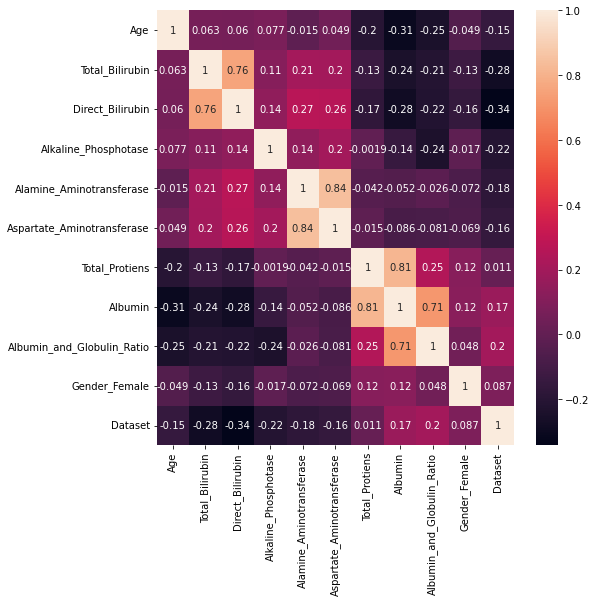

In [51]:
fig,ax = plt.subplots(figsize=(8,8))

sns.heatmap(NormData.corr(), annot=True)

In [52]:
# Finding columns with specific correlation:

def correlation(dataset,threshold):
    columns_corr = set() #taking set to avoid repeated values
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                colname = corr_matrix.columns[i]
                columns_corr.add(colname)
    return columns_corr

In [53]:
# attributes with correlation more than 0.50

list(correlation(NormData,0.5))

['Albumin_and_Globulin_Ratio',
 'Aspartate_Aminotransferase',
 'Albumin',
 'Direct_Bilirubin']

In [54]:
NormalDistributedData.shape

(266, 11)

Text(0.5, 1.0, 'Frequency distribution of Dataset')

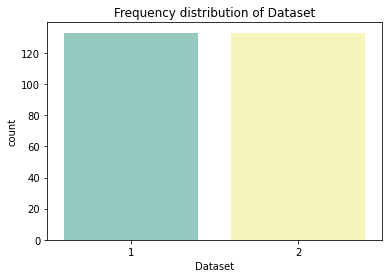

In [55]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.countplot(x="Dataset", data=NormData, palette="Set3")
ax.set_title("Frequency distribution of Dataset")


In [56]:
correlation(NormData,0.7)

{'Albumin',
 'Albumin_and_Globulin_Ratio',
 'Aspartate_Aminotransferase',
 'Direct_Bilirubin'}

*Now we have a balanced DataFrame with UnderSampling, we can begin training our ML Model*

In [57]:
#Dropping Columns with Correlation equal to or higher than 0.7

Xtrain = NormData.drop(['Dataset','Albumin', 'Aspartate_Aminotransferase', 'Direct_Bilirubin'],axis=1)
ytrain = NormData['Dataset']

Xtest = test_df.drop(['Dataset','Albumin', 'Aspartate_Aminotransferase', 'Direct_Bilirubin'],axis=1)
ytest = test_df['Dataset']

In [58]:
Xtrain.head()


,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin_and_Globulin_Ratio,Gender_Female
419,55,0.789982,4.364626,-0.157366,0.199913,-0.777465,1.0
525,53,-0.386642,-0.331959,-0.250535,1.398600,-0.149025,1.0
214,38,-0.257697,-0.455554,-0.343704,0.660946,0.165194,0.0
264,38,-0.402760,-0.179526,-0.140924,0.845360,1.359229,0.0
271,4,-0.402760,0.697994,0.390688,0.015500,-0.149025,0.0


In [59]:
Xtest.head()

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin_and_Globulin_Ratio,Gender_Female
94,60,0.306438,-0.504991,0.248194,0.292120,-0.777465,0.0
411,23,-0.160988,0.899864,-0.288899,0.384326,-0.777465,1.0
218,6,-0.434996,-0.006494,-0.234093,-1.552014,-0.777465,0.0
99,18,-0.418878,0.088261,1.245653,0.384326,0.479414,0.0
118,32,2.031078,-0.043572,6.956379,-0.814361,0.165194,0.0


##  Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
#using Entropy:


DTclf_ent = DecisionTreeClassifier(criterion='entropy')
DTclf_ent.fit(Xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

In [62]:
pred_ent = DTclf_ent.predict(Xtest)
# pred_ent

In [63]:
print(classification_report(ytest,pred_ent))
print(confusion_matrix(ytest,pred_ent))
print(accuracy_score(ytest,pred_ent)*100)

              precision    recall  f1-score   support

           1       0.79      0.69      0.74        83
           2       0.42      0.56      0.48        34

    accuracy                           0.65       117
   macro avg       0.61      0.62      0.61       117
weighted avg       0.68      0.65      0.66       117

[[57 26]
 [15 19]]
64.95726495726495


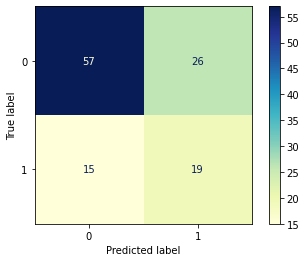

In [64]:
from sklearn.metrics import plot_confusion_matrix,ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(ytest,pred_ent)).plot(cmap='YlGnBu')

In [65]:
#using Gini:

DTclf_gini = DecisionTreeClassifier(criterion='gini')
DTclf_gini.fit(Xtrain,ytrain)

pred_gini = DTclf_gini.predict(Xtest)
# pred_gini

In [66]:
print(classification_report(ytest,pred_gini))
print(confusion_matrix(ytest,pred_gini))
print(accuracy_score(ytest,pred_gini)*100)

              precision    recall  f1-score   support

           1       0.75      0.65      0.70        83
           2       0.36      0.47      0.41        34

    accuracy                           0.60       117
   macro avg       0.55      0.56      0.55       117
weighted avg       0.64      0.60      0.61       117

[[54 29]
 [18 16]]
59.82905982905983


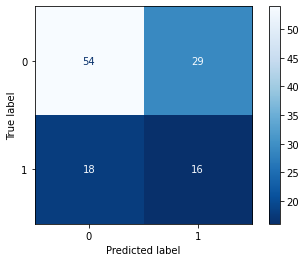

In [67]:
ConfusionMatrixDisplay(confusion_matrix(ytest,pred_gini)).plot(cmap='Blues_r')

# KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(Xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [70]:
pred_knn = KNN.predict(Xtest)
# pred_knn

In [71]:
print(classification_report(ytest,pred_knn))
print(confusion_matrix(ytest,pred_knn))
print(accuracy_score(ytest,pred_knn)*100)

              precision    recall  f1-score   support

           1       0.85      0.55      0.67        83
           2       0.41      0.76      0.54        34

    accuracy                           0.62       117
   macro avg       0.63      0.66      0.60       117
weighted avg       0.72      0.62      0.63       117

[[46 37]
 [ 8 26]]
61.53846153846154


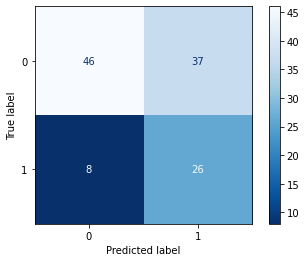

In [72]:
ConfusionMatrixDisplay(confusion_matrix(ytest,pred_knn)).plot(cmap='Blues_r')

# SVM

In [73]:
from sklearn import svm

In [74]:
SVM = svm.SVC()
SVM.fit(Xtrain,ytrain)

SVC()

In [75]:
pred_svm = SVM.predict(Xtest)
pred_svm

array([1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 1], dtype=int64)

In [76]:
print(classification_report(ytest,pred_svm))
print(confusion_matrix(ytest,pred_svm))
print(accuracy_score(ytest,pred_svm)*100)

              precision    recall  f1-score   support

           1       0.78      0.75      0.77        83
           2       0.45      0.50      0.47        34

    accuracy                           0.68       117
   macro avg       0.62      0.62      0.62       117
weighted avg       0.69      0.68      0.68       117

[[62 21]
 [17 17]]
67.52136752136752


In [77]:
predictions = [pred_ent,pred_gini,pred_knn,pred_svm]



In [78]:
acc_score=[]
recall = []
precision = []
f1 = []
for i in predictions:
    acc_score.append(round(accuracy_score(ytest,i)*100,2))
    recall.append(round(recall_score(ytest,i)*100,2))
    precision.append(round(precision_score(ytest,i)*100,2))
    f1.append(round(f1_score(ytest,i)*100,2))
print(acc_score)
print(recall)
print(precision)
print(f1)

[64.96, 59.83, 61.54, 67.52]
[68.67, 65.06, 55.42, 74.7]
[79.17, 75.0, 85.19, 78.48]
[73.55, 69.68, 67.15, 76.54]


In [ ]:
table

In [ ]:
table.loc['Accuracy']=acc_score
table.loc['Recall']=recall
table.loc['Precision']=precision
table.loc['F1_score']=f1

                    

table